<a href="https://colab.research.google.com/github/Sugam1530/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir images

In [3]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower", limit = 30, output_dir= 'images', adult_filter_off=True)

[%] Downloading Images to /content/images/pretty sunflower


[!!]Indexing page: 1

[%] Indexed 15 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/736x/d8/4c/0f/d84c0fa71e8acd4f46da3da5a6b5987d.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.hdwallpapers.in/download/field_of_yellow_wide_sunflowers_under_blue_sky_hd_flowers-1600x900.jpg
[!] Issue getting: https://www.hdwallpapers.in/download/field_of_yellow_wide_sunflowers_under_blue_sky_hd_flowers-1600x900.jpg
[!] Error:: HTTP Error 503: Service Temporarily Unavailable
[%] Downloading Image #2 from http://2.bp.blogspot.com/-N8rhFRmfqLg/Ucd1850_cII/AAAAAAAABOU/-fcF7wxuCts/s1600/pretty-autumn-beauty-sunflower-blossom4.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/18/52/ba/1852ba8cca137ec5b1290d6b85dadc7b--sunflowers-pretty-flowers.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://wallup.net/wp-content/uploads/2018/03/23/559306-sunflowers-flower

In [4]:
downloader.download("cricket ball", limit = 30, output_dir= 'images', adult_filter_off=True)

Streaming output truncated to the last 5000 lines.
[%] Indexed 16 Images on Page 697.




[!!]Indexing page: 698

[%] Indexed 16 Images on Page 698.




[!!]Indexing page: 699

[%] Indexed 16 Images on Page 699.




[!!]Indexing page: 700

[%] Indexed 8 Images on Page 700.




[!!]Indexing page: 701

[%] Indexed 16 Images on Page 701.




[!!]Indexing page: 702

[%] Indexed 16 Images on Page 702.




[!!]Indexing page: 703

[%] Indexed 8 Images on Page 703.




[!!]Indexing page: 704

[%] Indexed 16 Images on Page 704.




[!!]Indexing page: 705

[%] Indexed 16 Images on Page 705.




[!!]Indexing page: 706

[%] Indexed 16 Images on Page 706.




[!!]Indexing page: 707

[%] Indexed 16 Images on Page 707.




[!!]Indexing page: 708

[%] Indexed 16 Images on Page 708.




[!!]Indexing page: 709

[%] Indexed 16 Images on Page 709.




[!!]Indexing page: 710

[%] Indexed 16 Images on Page 710.




[!!]Indexing page: 711

[%] Indexed 16 Images on Page 711.




[!!]Indexing page: 712

[%] In

In [12]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize


target = []
images = []
flat_data = []

DATADIR = "/content/images"
CATAGORIES = ['pretty sunflower','cricket ball']

for category in CATAGORIES:
  class_num = CATAGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # print(img_array.shape)
    # plt.imshow(img_array)
    img_resize = resize(img_array,(150,150,3))
    flat_data.append(img_resize.flatten())
    images.append(img_resize)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [16]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

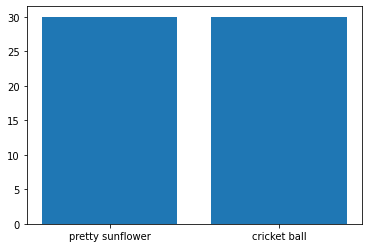

In [18]:
unique, count = np.unique(target, return_counts=True)
plt.bar(CATAGORIES,count)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data,target,
                                    test_size=0.3,random_state=109)

In [28]:
from inspect import Parameter
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [29]:
y_pred = clf.predict(x_test)

In [30]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [31]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
accuracy_score(y_pred, y_test)

0.7222222222222222

In [34]:
confusion_matrix(y_pred, y_test)

array([[10,  4],
       [ 1,  3]])

In [35]:
import pickle
pickle.dump(clf,open('img_model.p', 'wb'))

In [36]:
model = pickle.load(open('img_model.p','rb'))

Enter your urlhttps://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/close-up-of-tulips-blooming-in-field-royalty-free-image-1584131603.jpg
(1372, 2186, 3)
Predicted Output is:pretty sunflower


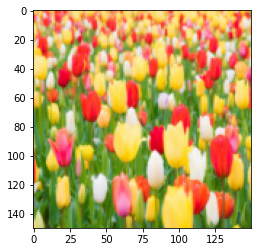

In [41]:
flat_data = []
url = input('Enter your url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATAGORIES[y_out[0]]
print(f'Predicted Output is:{y_out}')